## Decision Tree

In [1]:
from sklearn import tree
X = [[0,0],[1,1]] #feature value
Y = [0,1] # 1 column,2 rows,target value
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)

In [2]:
clf.predict([[2., 2.]])


array([1])

In [3]:
clf.predict_proba([[2.,2.]])

array([[0., 1.]])

In [4]:
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn import tree
from sklearn.datasets import load_iris
iris = load_iris()
X1,Y1=load_iris(return_X_y = True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X1,Y1)

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 

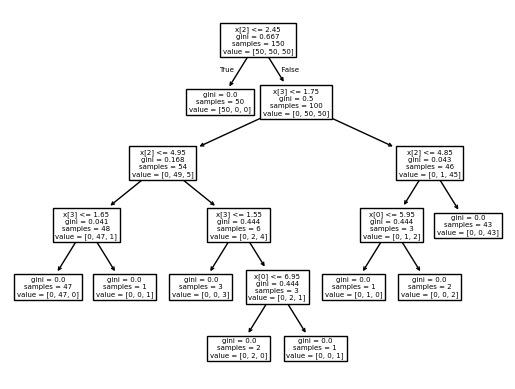

In [5]:
tree.plot_tree(clf.fit(iris.data,iris.target))

In [6]:
import numpy as np
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    node_id, depth = stack.pop()
    node_depth[node_id] = depth


    is_split_node = children_left[node_id] != children_right[node_id]
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=values[i]
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=values[i],
            )
        )

The binary tree structure has 17 nodes and has the following tree structure:

node=0 is a split node with value=[[0.33333333 0.33333333 0.33333333]]: go to node 1 if X[:, 2] <= 2.449999988079071 else to node 2.
	node=1 is a leaf node with value=[[1. 0. 0.]].
	node=2 is a split node with value=[[0.  0.5 0.5]]: go to node 3 if X[:, 3] <= 1.75 else to node 12.
		node=3 is a split node with value=[[0.         0.90740741 0.09259259]]: go to node 4 if X[:, 2] <= 4.950000047683716 else to node 7.
			node=4 is a split node with value=[[0.         0.97916667 0.02083333]]: go to node 5 if X[:, 3] <= 1.6500000357627869 else to node 6.
				node=5 is a leaf node with value=[[0. 1. 0.]].
				node=6 is a leaf node with value=[[0. 0. 1.]].
			node=7 is a split node with value=[[0.         0.33333333 0.66666667]]: go to node 8 if X[:, 3] <= 1.550000011920929 else to node 9.
				node=8 is a leaf node with value=[[0. 0. 1.]].
				node=9 is a split node with value=[[0.         0.66666667 0.33333333]]: go 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,train_size=0.8,random_state=42)

In [9]:
node_indicator = clf.decision_path(X1_test)
leaf_id = clf.apply(X1_test)

sample_id = 0
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

print("Rules used to predict sample {id}:\n".format(id=sample_id))
for node_id in node_index:
    if leaf_id[sample_id] == node_id:
        continue

    if X1_test[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node} : (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            feature=feature[node_id],
            value=X1_test[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

Rules used to predict sample 0:

decision node 0 : (X_test[0, 2] = 4.7) > 2.449999988079071)
decision node 2 : (X_test[0, 3] = 1.2) <= 1.75)
decision node 3 : (X_test[0, 2] = 4.7) <= 4.950000047683716)
decision node 4 : (X_test[0, 3] = 1.2) <= 1.6500000357627869)


In [10]:
import numpy as np
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value
print(n_nodes)
print(children_left)
print(children_right)
print(feature)
print(threshold)
print(values)

17
[ 1 -1  3  4  5 -1 -1  8 -1 10 -1 -1 13 14 -1 -1 -1]
[ 2 -1 12  7  6 -1 -1  9 -1 11 -1 -1 16 15 -1 -1 -1]
[ 2 -2  3  2  3 -2 -2  3 -2  0 -2 -2  2  0 -2 -2 -2]
[ 2.44999999 -2.          1.75        4.95000005  1.65000004 -2.
 -2.          1.55000001 -2.          6.94999981 -2.         -2.
  4.85000014  5.95000005 -2.         -2.         -2.        ]
[[[0.33333333 0.33333333 0.33333333]]

 [[1.         0.         0.        ]]

 [[0.         0.5        0.5       ]]

 [[0.         0.90740741 0.09259259]]

 [[0.         0.97916667 0.02083333]]

 [[0.         1.         0.        ]]

 [[0.         0.         1.        ]]

 [[0.         0.33333333 0.66666667]]

 [[0.         0.         1.        ]]

 [[0.         0.66666667 0.33333333]]

 [[0.         1.         0.        ]]

 [[0.         0.         1.        ]]

 [[0.         0.02173913 0.97826087]]

 [[0.         0.33333333 0.66666667]]

 [[0.         1.         0.        ]]

 [[0.         0.         1.        ]]

 [[0.         0.      

## Principal component analysis (PCA)


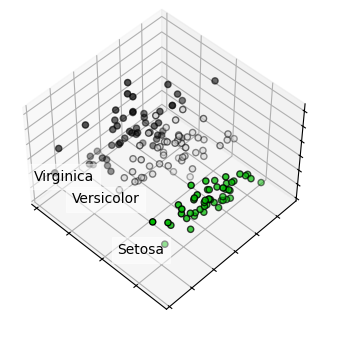

In [11]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import numpy as np
from sklearn import datasets,decomposition

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4,3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev = 48, azim=134)
ax.set_position([0,0,0.95,1])

plt.cla()
pca  = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa",0), ("Versicolor",1),("Virginica",2)]:
    ax.text3D(
        X[y == label,0].mean(),
        X[y == label,1].mean() + 1.5,
        X[y == label,2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5,edgecolor="w",facecolor="w"),
    )
y = np.choose(y, [1,2,0]).astype(float)
ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

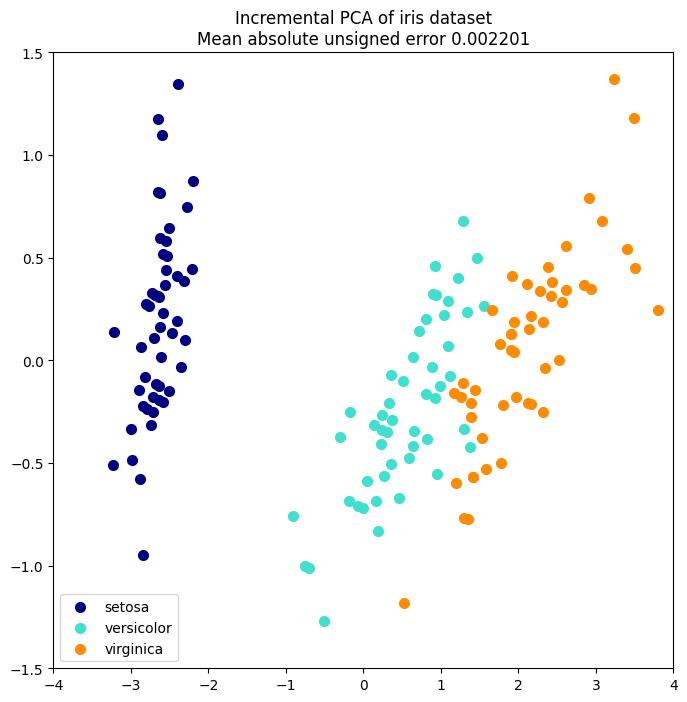

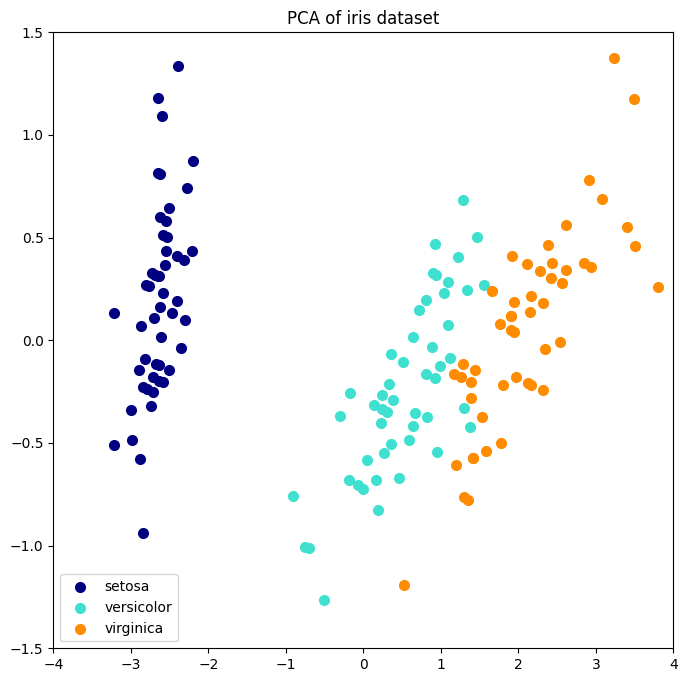

In [12]:

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA

iris = load_iris()
X = iris.data
y = iris.target

n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

colors = ["navy", "turquoise", "darkorange"]

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(
            X_transformed[y == i, 0],
            X_transformed[y == i, 1],
            color=color,
            lw=2,
            label=target_name,
        )

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of iris dataset\nMean absolute unsigned error %.6f" % err)
    else:
        plt.title(title + " of iris dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()

In [13]:
column_name = [ 'CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'] 

In [14]:
import pandas as pd 
import numpy as np
df = pd.read_csv(r"C:\Users\admin\Desktop\Machine learning\Day-17\housing.csv",header=1)
df.columns = column_name
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
1,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
3,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
500,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
501,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
502,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [15]:
X = df[[ 'CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']].values   
Y = df[['MEDV']]

In [16]:
pca  = decomposition.PCA(n_components=1)
pca.fit(X)


PCA(n_components=1)

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [20]:
model.fit(X,Y) 

LinearRegression()

## Python Interview Preparation


# What is mutable and immutable objects/data types in Python?


Mutable objects in Python -- Objects that can change after creation. Lists, byte arrays, sets, and dictionaries.

In [22]:
list_var = [17,10]
list_var

[17, 10]

In [23]:
id(list_var)

1645388017856

In [25]:
list_var += [17]
list_var

[17, 10, 17, 17]

In [31]:
id(list_var) # ID of the object didn't change.


1645388017856

Immutable objects in Python -- Numeric data types, strings, bytes, frozen sets, and tuples.



In [32]:
tuple_var = (17,)
tuple_var

(17,)

In [33]:
id(tuple_var)

1645249772752

In [34]:
tuple_var += (10,)
tuple_var

(17, 10)

In [35]:
id(tuple_var) # ID changes when made changes in object.


1645389944320

Mutable objects and functon arguments


In [37]:
def sample_func(sample_arg):
    sample_arg.append(10)

sample_list = [7,8,9]
sample_func(sample_list)
print(sample_list)

[7, 8, 9, 10]


Memory Allocation of Tuple and List


In [45]:
tuple_var = tuple() #Immutable
tuple_var.__sizeof__() # it take 24 bytes for empty tuple and after the it add 8 bytes


24

In [47]:
tuple_var =  (1)
tuple_var.__sizeof__()

28

In [48]:
tuple_var =  (1,2)
tuple_var.__sizeof__()

40

In [49]:
tuple_var =  (1,2,3)
tuple_var.__sizeof__()

48

In [51]:
list_var = list()   #list are mutttable
list_var.__sizeof__()

40

In [52]:
list_var.append(1)
list_var.__sizeof__()

72

In [54]:
list_var.append(1)
list_var.__sizeof__()

72

In [55]:
list_var.append([1,2])
list_var.__sizeof__()

72

In [56]:
list_var

[1, 1, [1, 2]]

Reusablity


Tuple literally assigns the same object to the new variable while list basically copies all the elements of the existing list

In [58]:
old_list =[1,2]
old_list.append(3)
old_list

[1, 2, 3]

In [59]:
id(old_list)

1645393415744

In [61]:
new_list = list(old_list)
new_list

[1, 2, 3]

In [64]:
#Copying list

In [65]:
old_list.__sizeof__()

104

In [66]:
id(new_list)

1645393835072

In [67]:
new_list.__sizeof__()

72

In [69]:
## Tuple copy

In [70]:
old_tuple = (1,2)
id(old_tuple)

1645388039808

In [71]:
old_tuple.__sizeof__()

40

In [ ]:
# Positional arguments representation

In [74]:
def sum(a,b,/,c=10):
    return a+b+c
sum(10,12,c=12)

34

In [ ]:
## F String can also do operations

In [76]:
a,b = 10, 12
f"Sum of a and b is {a+b}"
f"Value of c is {(c := a+b)}"

'Value of c is 22'

In [77]:
# Explain Generators and use case of it.


In [83]:
# Search function as generator, effective for returning some set as result with functionality like 'Load 10 more items'

dataset = [
    {'keyword': 'python', 'data': 'Python is a programming language.'},
    {'keyword': 'java', 'data': 'Java is a programming language.'},
    {'keyword': 'javascript', 'data': 'JavaScript is a programming language.'}
]

def search_result(keyword):
    found = False
    for item in dataset:
        if keyword in item['keyword']:
            found = True
            yield item['data']
    if not found:
        yield 'No match found.'


search_object = search_result('python')

try:
    print(next(search_object))
except StopIteration:
    print("No more results.")

search_object = search_result('ruby')

try:
    print(next(search_object))
except StopIteration:
    print("No more results.")


Python is a programming language.
No match found.


## Exception

In [87]:
while True:
    try:
        x = int(input("Please enter a number: "))
        break
    except ValueError:
        print("Oops!  That was no valid number.  Try again...")


Please enter a number:  abcd


Oops!  That was no valid number.  Try again...


Please enter a number:  777


In [88]:
class B(Exception):
    pass

class C(B):
    pass

class D(C):
    pass

for cls in [B,C,D]:
    try:
        raise cls()
    except D:
        print("D")
    except C:
        print("C")
    except B:
        print("B")

B
C
D


In [90]:
class B(Exception):
    pass

class C(B):
    pass

class D(C):
    pass

for cls in [B,C,D]:
    try:
        raise cls()
    except B:
        print("B")
    except C:
        print("C")
    except D:
        print("D")

B
B
B


In [91]:
class B(D):
    pass

class C(B):
    pass

class D(Exception):
    pass

for cls in [B,C,D]:
    try:
        raise cls()
    except B:
        print("B")
    except C:
        print("C")
    except D:
        print("D")

B
B
D


In [94]:
try:
    raise Exception('spam', 'eggs')
except Exception as inst:
    print(type(inst))    # the exception type
    print(inst.args)     # arguments stored in .args
    print(inst)          # __str__ allows args to be printed directly,
                         # but may be overridden in exception subclasses
    x, y = inst.args     # unpack args
    print('x =', x)
    print('y =', y)


<class 'Exception'>
('spam', 'eggs')
('spam', 'eggs')
x = spam
y = eggs
